# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [5]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

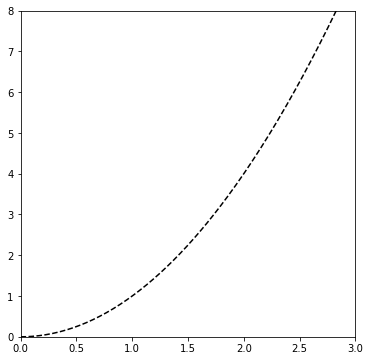

In [6]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

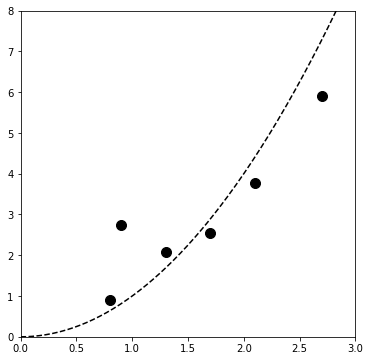

In [7]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [8]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.50181271]
-1.1311795341478983


Definiujemy naszą funkcję regresji

In [9]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

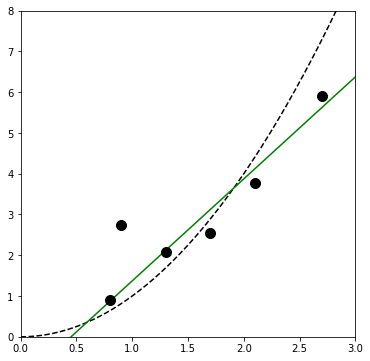

In [10]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [11]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

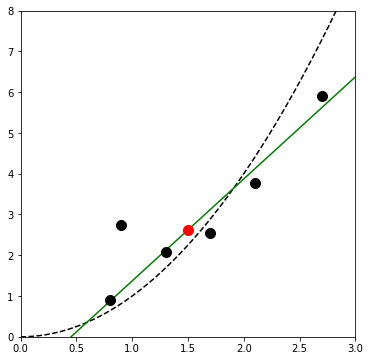

In [12]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [13]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.8877869165543635
0.8736035851022084


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [14]:
deg=1
xx=np.vander(x, deg + 1)
xx

array([[0.2, 1. ],
       [0.5, 1. ],
       [0.8, 1. ],
       [0.9, 1. ],
       [1.3, 1. ],
       [1.7, 1. ],
       [2.1, 1. ],
       [2.7, 1. ]])

In [15]:
A = xx
np.linalg.solve(np.dot(A.T, A), A.T*y)

array([[ 0.14328569,  0.1223391 , -0.08501649, -0.20441675,  0.01031172,
         0.21549049,  0.62229334,  1.6775256 ],
       [-0.26624481, -0.2549389 ,  0.22059543,  0.60234801,  0.24541902,
         0.0430981 , -0.32057536, -1.40088102]])

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [12]:
from scipy import optimize

def f(a):
    x, y = a
    return (x+1)**2 + y**2
x0 = [0,0] # first guess
# x0 = [-1, 0] # guess, which is "accidentaly" the result
res = optimize.fmin_cg(f, x0)

print("\n\nmin f =", res, "≈", np.round(res))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3


min f = [-1.00000001e+00 -7.45058060e-09] ≈ [-1. -0.]


# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [13]:
def compute_error(A, *P):
    a,b = A
    x,y = P
    n = len(x)
    sum = 0.0
    for i in range(1, n):
        sum += (y[i] - a*x[i] + b)**2
    return sum

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [14]:
x0 = np.asarray((1, 1))  # initial guess
res = optimize.fmin_cg(compute_error, x0, args=[x,y])
print("\n\nResult:", res)

Optimization terminated successfully.
         Current function value: 2.472000
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6


Result: [2.85713422 1.02289566]


# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [15]:
def compute_error_1(A, *P):
    a,b = A
    x,y = P
    n = len(x)
    sum = 0.0
    for i in range(1, n):
        sum += abs(y[i] - a*x[i] + b)
    return sum

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [16]:
x0 = np.asarray((1, 1))  # initial guess
res = optimize.fmin_cg(compute_error_1, x0, args=[x,y])
print("\n\nResult:", res)

         Current function value: 3.618535
         Iterations: 4
         Function evaluations: 258
         Gradient evaluations: 82


Result: [2.80527773 0.78102345]


_Czy wyniki są podobne do wyników z poprzednich zadań?_  
Odp.: Zupełnie różne

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


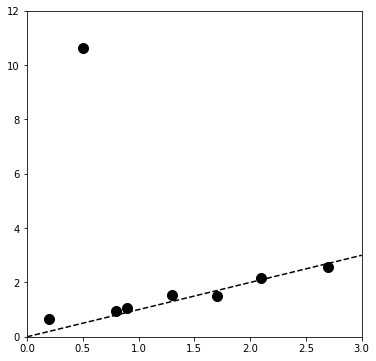

In [17]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [18]:
points = np.column_stack((x,y))

[-0.73049867]
3.563189021314196


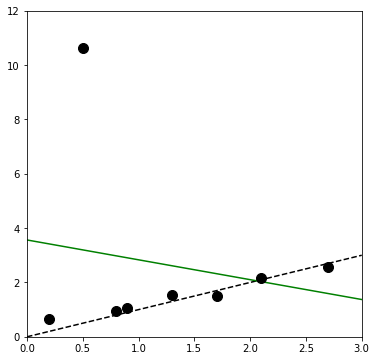

In [19]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

f_lr = lambda x: lr.coef_ * x +lr.intercept_

x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

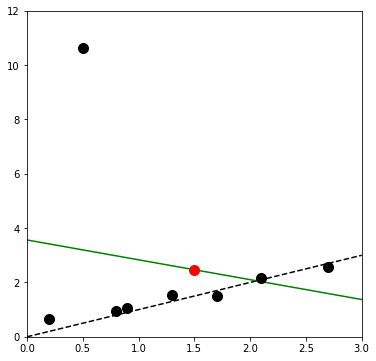

In [21]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()